In [91]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt



In [92]:
self_report = pd.read_csv("../data/nancy_sus/self_report.csv")

In [93]:
self_report.head()

,Subject,Naturalness,Cognitive_Load,Motivation,System
0,p1,NaN,1,4,A
1,p2,NaN,2,4,A
2,p3,NaN,3,3,A
3,p4,NaN,3,3,A
4,p5,NaN,2,4,A


In [94]:
scores = self_report.melt(id_vars=['Subject','System'], value_vars=['Naturalness','Cognitive_Load','Motivation'])
scores.head()

,Subject,System,variable,value
0,p1,A,Naturalness,NaN
1,p2,A,Naturalness,NaN
2,p3,A,Naturalness,NaN
3,p4,A,Naturalness,NaN
4,p5,A,Naturalness,NaN


In [95]:
scores.rename(columns={'variable': 'Self-Report', 'value': 'MOS'}, inplace=True)


In [96]:
scores.head()

,Subject,System,Self-Report,MOS
0,p1,A,Naturalness,NaN
1,p2,A,Naturalness,NaN
2,p3,A,Naturalness,NaN
3,p4,A,Naturalness,NaN
4,p5,A,Naturalness,NaN


In [97]:
with open("../data/nancy_sus/system_ids.txt", 'r') as ids:
    system_ids = ids.readlines()
    system_ids = [y.strip() for y in system_ids]

In [98]:
for system in system_ids:
    info = system.split(":")
    scores['System'].replace(info[0], info[1], inplace=True)


In [99]:
scores.tail()

,Subject,System,Self-Report,MOS
220,p11,LQ-HMM,Motivation,4.0
221,p12,LQ-HMM,Motivation,4.0
222,p13,LQ-HMM,Motivation,1.0
223,p14,LQ-HMM,Motivation,5.0
224,p15,LQ-HMM,Motivation,4.0


In [101]:
plot_path = "figure_name.pdf"

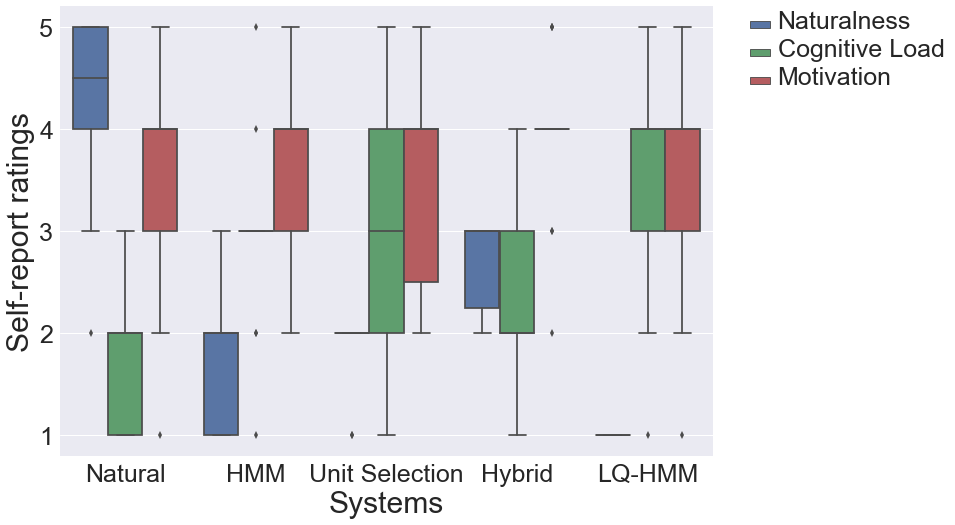

In [102]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax = sns.boxplot(data=scores, x = 'System', y='MOS', hue="Self-Report")
ax.set(xlabel='System', ylabel='Mean-Opinion Self-Report Scores')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

ax.set_xlabel("Systems", fontsize=30)
ax.set_ylabel("Self-report ratings", fontsize=30)
ax.tick_params(labelsize=25)


leg_handles = ax.get_legend_handles_labels()[0]

ax.legend( leg_handles, ['Naturalness','Cognitive Load', 'Motivation',],bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,  markerscale=5)

plt.setp(ax.get_legend().get_texts(), fontsize='25') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

ax.figure.savefig(plot_path, bbox_inches="tight")